### Packages

In [159]:
# Data wrangling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
import os


# Added
import statsmodels.formula.api as smf
import ast # used for converting string lists to lists with string elements

### Functions

In [160]:
def linear_regression(df, dependent_variable, independent_variable):
    """
    Function 
    """
    # Declare the model
    formula = f"{dependent_variable} ~ {independent_variable}"
    mod = smf.ols(formula=formula, data=df)

    # Fit the model
    np.random.seed(2)
    res = mod.fit()

    # Print the summary output provided by the library
    print(res.summary())


In [161]:
def plot_dual_scatterplots(df, x_variable, dependent_variable1, dependent_variable2, xlabel_text, ylabel_text1, ylabel_text2, title1, title2):
    """
    Function to plot scatterplots with linear regression for two dependent variables against a single independent variable.
    Includes correlation coefficients and R^2 values on the plots.
    """
    # Handling missing data
    df = df.dropna(subset=[x_variable, dependent_variable1, dependent_variable2])

    # Calculate correlation coefficients and R^2 values
    corr_coef1, p_value1 = stats.pearsonr(df[x_variable], df[dependent_variable1])
    corr_coef2, p_value2 = stats.pearsonr(df[x_variable], df[dependent_variable2])
    r_squared1 = corr_coef1 ** 2
    r_squared2 = corr_coef2 ** 2
    

    palette = sns.color_palette()
    blue = palette[0]
    green = palette[1]

    # Setting up the matplotlib figure
    plt.figure(figsize=(15, 6))

    # Scatter plot with regression line for dependent_variable1
    plt.subplot(1, 2, 1)
    sns.regplot(x=x_variable, y=dependent_variable1, data=df, color=blue, scatter_kws={'alpha':0.5}, line_kws={'color':'black'})
    plt.text(0.05, 0.9, f"r={corr_coef1:.2f} \nR²={r_squared1:.2f}", transform=plt.gca().transAxes, fontsize=15)
    plt.title(title1, fontsize=16)
    plt.xlabel(xlabel_text, fontsize=15)
    plt.ylabel(ylabel_text1, fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    # Scatter plot with regression line for dependent_variable2
    plt.subplot(1, 2, 2)
    sns.regplot(x=x_variable, y=dependent_variable2, data=df, color=green, scatter_kws={'alpha':0.5}, line_kws={'color':'black'})
    plt.text(0.05, 0.9, f"r={corr_coef2:.2f} \nR²={r_squared2:.2f}", transform=plt.gca().transAxes, fontsize=15)
    plt.title(title2, fontsize=16)
    plt.xlabel(xlabel_text, fontsize=15)
    plt.ylabel(ylabel_text2, fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    folder_path = os.path.join('figures', x_variable)
    os.makedirs(folder_path, exist_ok=True)
    file_path = os.path.join(folder_path, f'{x_variable}_scatterplot.png')
    
    plt.savefig(file_path, dpi=1000)
    plt.tight_layout()
    plt.show()


# Data import

We begin by loading the two data sets and looking at the different attributes. We decide to add two columns **Movie release year** and **Actor birth year**.

In [162]:
# Load datasets
data_folder = './data_cleaned/'
movie_metadata = pd.read_csv(data_folder   + 'movie_cleaned.csv', lineterminator='\n')

# Replace spaces with underscores in column names
movie_metadata.columns = movie_metadata.columns.str.replace(' ', '_')


# Start Emma

**TMDB vote average**

Having filtered the data so every movie have at least 20 reviews we can now do a linear regression on TMDB vote average and movie release year

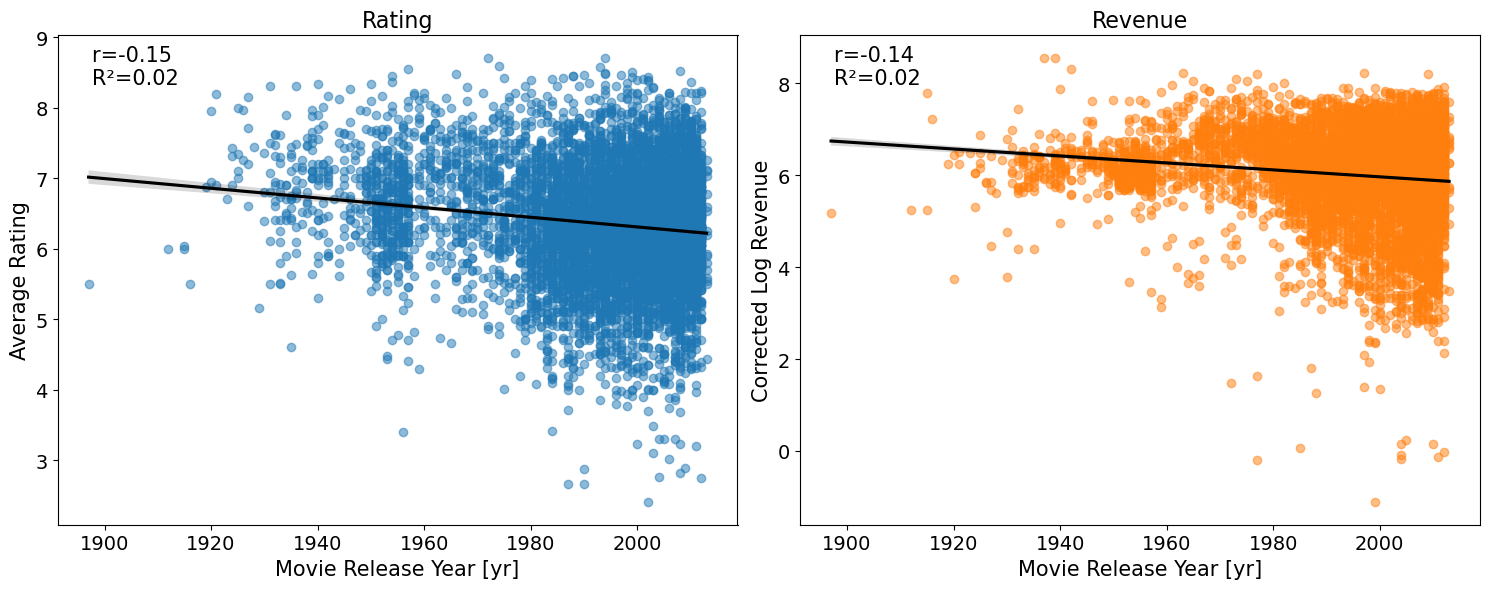

In [163]:
vote_average_label ='Average Rating'
revenue_label = 'Corrected Log Revenue'
score_title = 'Rating'
revenue_title = 'Revenue'
x_label = 'Movie Release Year [yr]'
plot_dual_scatterplots(movie_metadata,'Movie_release_year', 'TMDB_vote_average', 'log_balanced_Movie_box_office_revenue',x_label,vote_average_label, revenue_label, score_title, revenue_title)

In [164]:
linear_regression(movie_metadata,"Movie_release_year","TMDB_vote_average")
linear_regression(movie_metadata,"Movie_release_year","log_Movie_box_office_revenue")

                            OLS Regression Results                            
Dep. Variable:     Movie_release_year   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     166.8
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           9.31e-38
Time:                        21:34:16   Log-Likelihood:                -32303.
No. Observations:                7563   AIC:                         6.461e+04
Df Residuals:                    7561   BIC:                         6.462e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2013.2729      1.56

**Runtime**



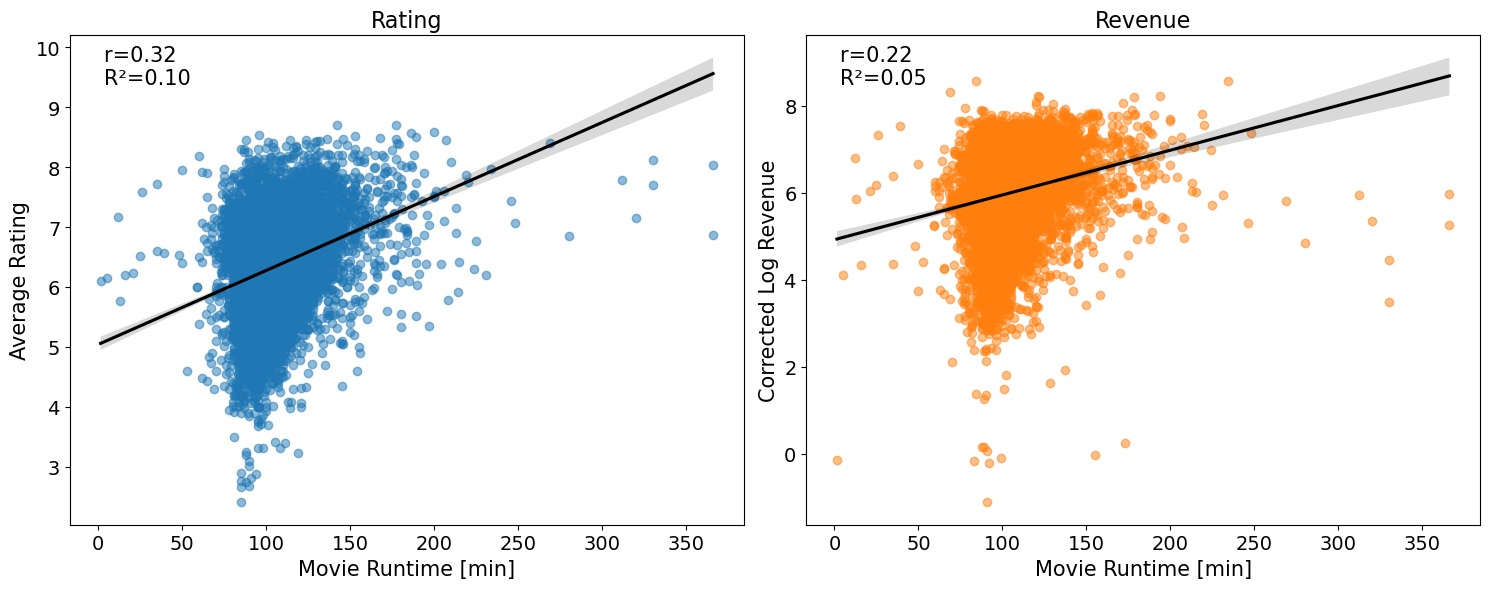

In [165]:
x_label = 'Movie Runtime [min]'
plot_dual_scatterplots(movie_metadata,'Movie_runtime', 'TMDB_vote_average', 'log_balanced_Movie_box_office_revenue',x_label,vote_average_label, revenue_label,score_title, revenue_title)

In [166]:
linear_regression(movie_metadata,"Movie_runtime","TMDB_vote_average")
linear_regression(movie_metadata,"Movie_runtime","log_Movie_box_office_revenue")

                            OLS Regression Results                            
Dep. Variable:          Movie_runtime   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     842.8
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          9.67e-176
Time:                        21:34:40   Log-Likelihood:                -33233.
No. Observations:                7537   AIC:                         6.647e+04
Df Residuals:                    7535   BIC:                         6.648e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            54.7480      1.79

**Vote count log**

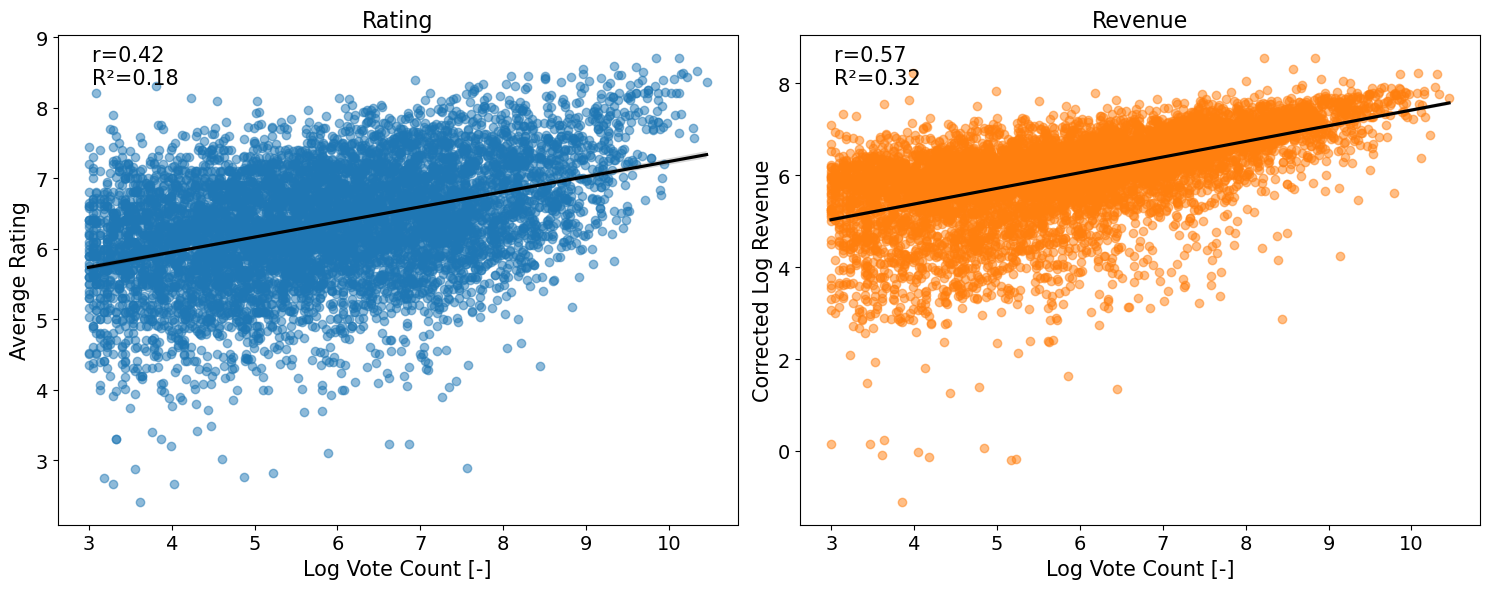

In [167]:
x_label = 'Log Vote Count [-]'
plot_dual_scatterplots(movie_metadata,'log_TMDB_vote_count', 'TMDB_vote_average', 'log_balanced_Movie_box_office_revenue',x_label,vote_average_label, revenue_label,score_title, revenue_title)

In [168]:
linear_regression(movie_metadata,"log_TMDB_vote_count","log_Movie_box_office_revenue")
linear_regression(movie_metadata,"log_TMDB_vote_count","TMDB_vote_average")

                             OLS Regression Results                            
Dep. Variable:     log_TMDB_vote_count   R-squared:                       0.412
Model:                             OLS   Adj. R-squared:                  0.412
Method:                  Least Squares   F-statistic:                     5297.
Date:                 Wed, 20 Dec 2023   Prob (F-statistic):               0.00
Time:                         21:35:02   Log-Likelihood:                -12325.
No. Observations:                 7563   AIC:                         2.465e+04
Df Residuals:                     7561   BIC:                         2.467e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Interc

**Male actor percentage**

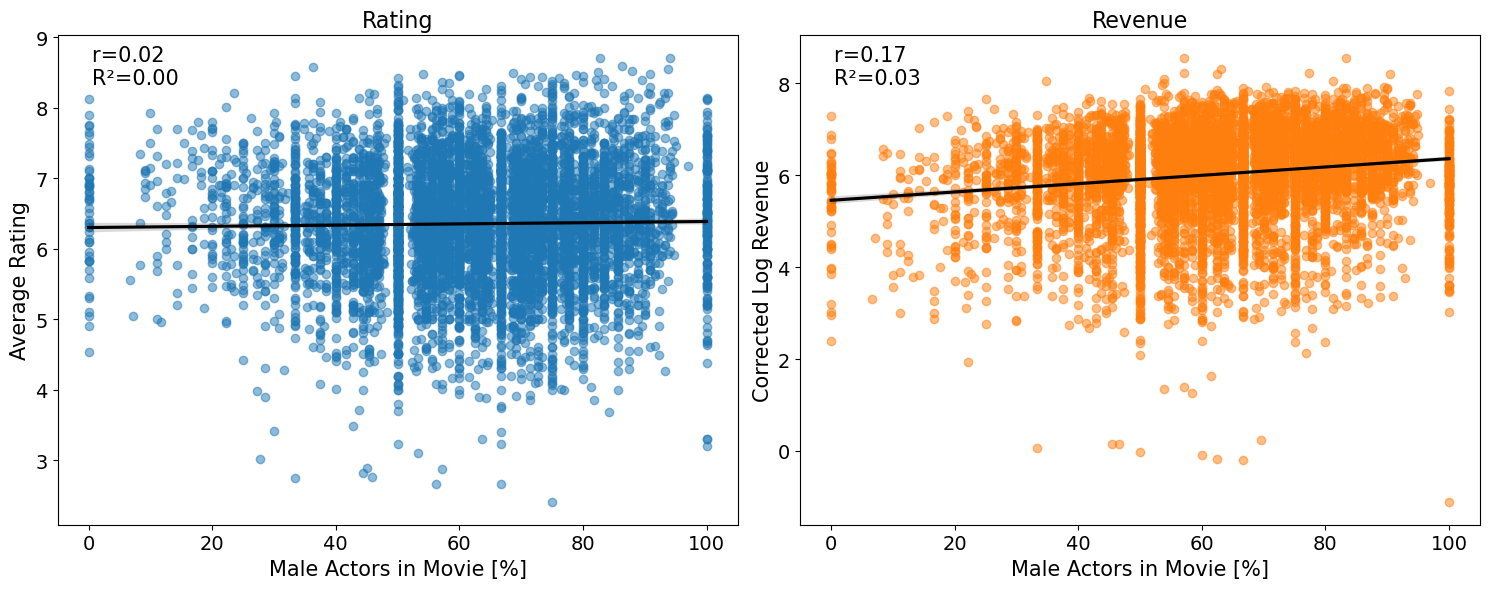

In [169]:
x_label = 'Male Actors in Movie [%]'
plot_dual_scatterplots(movie_metadata,'Male_actor_percentage', 'TMDB_vote_average', 'log_balanced_Movie_box_office_revenue',x_label,vote_average_label, revenue_label,score_title, revenue_title)

In [170]:
linear_regression(movie_metadata,"Male_actor_percentage","TMDB_vote_average")
linear_regression(movie_metadata,"Male_actor_percentage","log_Movie_box_office_revenue")

                              OLS Regression Results                             
Dep. Variable:     Male_actor_percentage   R-squared:                       0.000
Model:                               OLS   Adj. R-squared:                  0.000
Method:                    Least Squares   F-statistic:                     2.647
Date:                   Wed, 20 Dec 2023   Prob (F-statistic):              0.104
Time:                           21:35:19   Log-Likelihood:                -32235.
No. Observations:                   7493   AIC:                         6.447e+04
Df Residuals:                       7491   BIC:                         6.449e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercep

**Average age of actors**

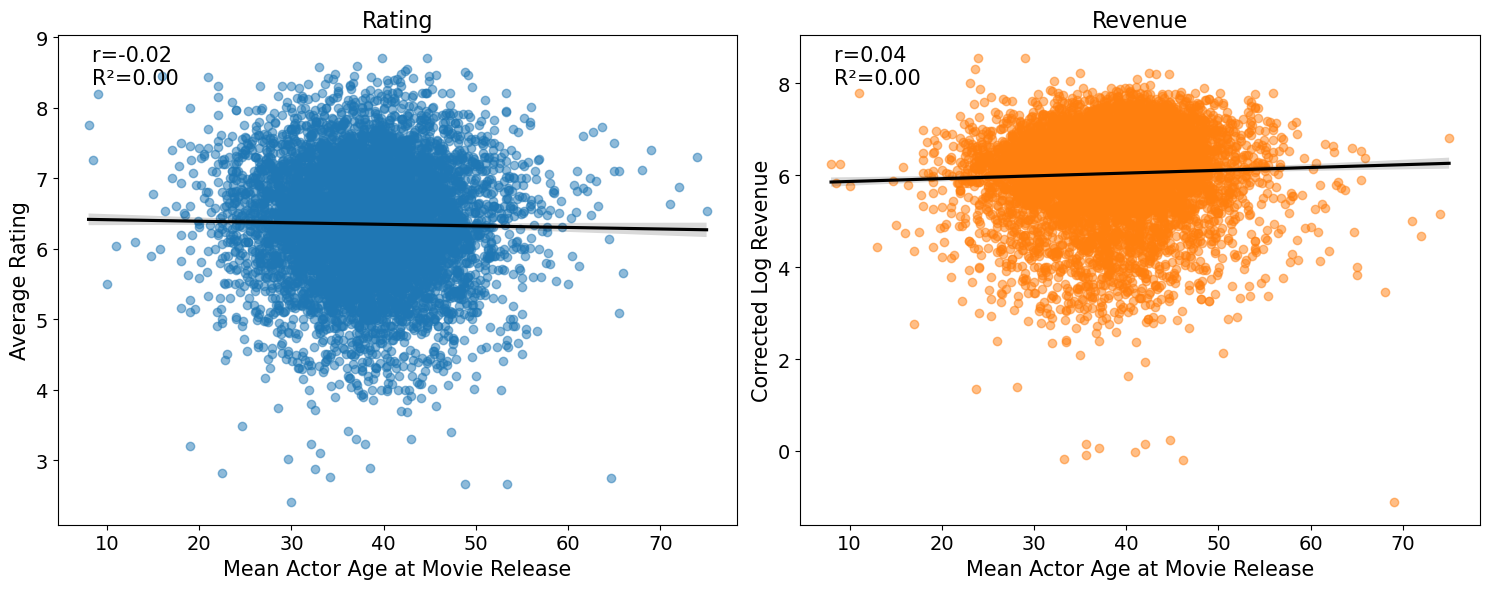

In [171]:
x_label = 'Mean Actor Age at Movie Release'
plot_dual_scatterplots(movie_metadata,'Mean_actor_age_at_movie_release', 'TMDB_vote_average', 'log_balanced_Movie_box_office_revenue',x_label,vote_average_label, revenue_label,score_title, revenue_title)


In [172]:
linear_regression(movie_metadata,"Mean_actor_age_at_movie_release","TMDB_vote_average")
linear_regression(movie_metadata,"Mean_actor_age_at_movie_release","log_Movie_box_office_revenue")

                                   OLS Regression Results                                  
Dep. Variable:     Mean_actor_age_at_movie_release   R-squared:                       0.000
Model:                                         OLS   Adj. R-squared:                  0.000
Method:                              Least Squares   F-statistic:                     2.585
Date:                             Wed, 20 Dec 2023   Prob (F-statistic):              0.108
Time:                                     21:35:35   Log-Likelihood:                -24532.
No. Observations:                             7301   AIC:                         4.907e+04
Df Residuals:                                 7299   BIC:                         4.908e+04
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0